In [45]:
import os, joblib
from tqdm import tqdm
from openclassrooms.p6 import *

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import set_config

In [2]:
STORAGE_PATH = "../data"
FILE_NAME = "data.csv"

# Data

In [29]:
feature_vgg16 = pd.read_csv(os.path.join(STORAGE_PATH, 'features_vgg16.csv'))
feature_use = pd.read_csv(os.path.join(STORAGE_PATH, 'features_use.csv'))
data = pd.read_csv(os.path.join(STORAGE_PATH, FILE_NAME))

# Merge features

In [ ]:
X = pd.concat([feature_use.add_prefix('use_'), feature_vgg16.add_prefix('vgg16_')], axis=1)

In [32]:
y = data.category_0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
param_grid = {
    "PCA__ratio": [None, 0.95, 0.99],
}

pipe = Pipeline(steps=[
    ('PCA', CustomPCA()),
    ('estimator', RandomForestClassifier(random_state=0))
])

display(pipe)

Pipeline(steps=[('PCA', CustomPCA()),
                ('estimator', RandomForestClassifier(random_state=0))])

In [48]:
results = pd.DataFrame()

for parameters in tqdm(ParameterGrid(param_grid)):
    
    pipe = pipe.set_params(**parameters)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    results = results.append({'score': score, 'parameters': parameters} , ignore_index=True)

100%|██████████| 3/3 [00:11<00:00,  3.75s/it]


In [49]:
best_results_parameters = results.loc[results.score == results.score.max(), 'parameters'].iloc[0]
results.loc[results.score == results.score.max()]

,parameters,score
0,{'PCA__ratio': None},0.885932


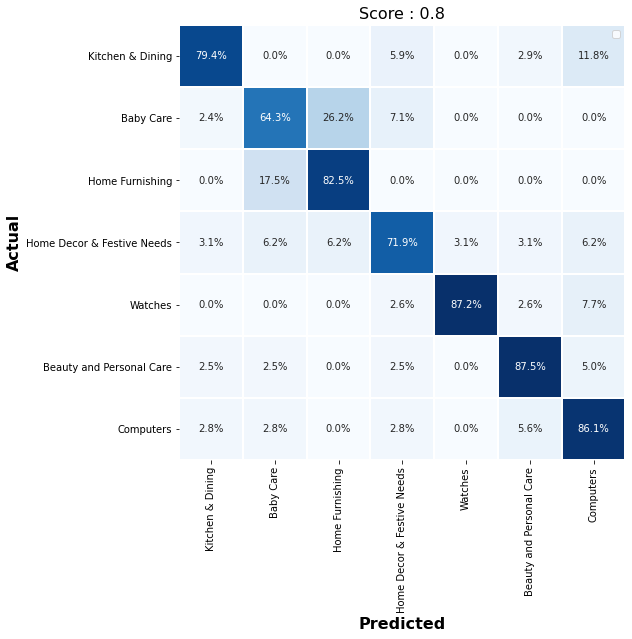

In [50]:
cm = ConfusionMatrix(y_test, y_pred, accuracy_score)
print(cm)